# EDA (Exploratory Data Analysis)
Después del proceso de ETL que resultó en la creación de los conjuntos de datos consolidados 'homicidios_limpio.csv' y 'lesiones_limpio.csv', procederemos al Análisis Exploratorio de Datos (EDA). Este análisis implica sumergirse en el conjunto de datos para comprender su estructura, abordar posibles valores atípicos, identificar duplicados y manejar valores faltantes.

Durante el EDA, exploraremos este conjunto de datos para descubrir patrones, tendencias y relaciones entre variables. Utilizaremos visualizaciones pertinentes para respaldar nuestras observaciones. El objetivo principal es extraer información valiosa que pueda impulsar futuras investigaciones y acciones relacionadas con la seguridad vial en la Ciudad de Buenos Aires, Argentina.

## Importar Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar Datos

In [3]:
# Se cargan los archivos limpios
df_homicidios = pd.read_csv("C:\\Users\\Gary Alexander Bean\\Desktop\\Proyecto-Individual-2-DA\\Datasets\\homicidios_limpio.csv")
df_lesiones = pd.read_csv("C:\\Users\\Gary Alexander Bean\\Desktop\\Proyecto-Individual-2-DA\\Datasets\\lesiones_limpio.csv")

In [4]:
df_homicidios.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal
3,2016-0004,1,2016-01-10,0.0,avenida,8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18.0,fatal
4,2016-0005,1,2016-01-21,5.0,avenida,1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29.0,fatal


In [5]:
df_lesiones.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,LC-2019-0000179,1,2019-01-01 00:00:00,9.0,NaN,14.0,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,NaN,leve
1,LC-2019-0000053,1,2019-01-01 00:00:00,1.0,NaN,8.0,-58.443510,-34.669125,auto,NaN,NaN,masculino,57.0,leve
2,LC-2019-0000063,1,2019-01-01 00:00:00,2.0,NaN,8.0,-58.468335,-34.677556,NaN,NaN,NaN,NaN,NaN,leve
3,LC-2019-0000079,1,2019-01-01 00:00:00,2.0,NaN,7.0,-58.437425,-34.647349,peaton,NaN,NaN,masculino,NaN,leve
4,LC-2019-0000082,4,2019-01-01 00:00:00,4.0,NaN,3.0,-58.398225,-34.604579,auto,NaN,NaN,masculino,45.0,leve


## Exploracion de datos

In [6]:
df_homicidios.shape

(717, 14)

In [7]:
df_lesiones.shape

(27599, 14)

In [8]:
# Obtener el conteo de nulos por columna de df_homicidios
null_count = df_homicidios.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df_homicidios.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           1    0.139470
tipo_calle            0    0.000000
comuna                0    0.000000
longitud              0    0.000000
latitud               0    0.000000
vehiculo_victima      9    1.255230
vehiculo_acusado     23    3.207810
rol                  11    1.534170
sexo                  6    0.836820
edad                 53    7.391911
gravedad              0    0.000000


In [9]:
# Obtener el conteo de nulos por columna de df_lesiones
null_count = df_lesiones.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df_lesiones.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           9    0.032610
tipo_calle        12880   46.668358
comuna             1625    5.887894
longitud           1657    6.003841
latitud            1657    6.003841
vehiculo_victima  12823   46.461828
vehiculo_acusado  17919   64.926265
rol               27599  100.000000
sexo               2228    8.072756
edad               4471   16.199862
gravedad              0    0.000000


### Fundamentación del Análisis de Datos

Durante la fase de ETL, se identificaron datos nulos que fueron tratados para evitar sesgos en los resultados. Aunque no se logró imputar todos los nulos, se optó por no eliminar registros para preservar la integridad de los datos.

#### Análisis del DataFrame 'df_homicidios':

- La columna 'franja_hora' tiene un valor nulo insignificante (0.14%).
- Las columnas 'vehiculo_victima', 'vehiculo_acusado', 'rol', 'sexo' y 'edad' tienen algunos nulos, pero en proporción son relativamente bajos.

#### Análisis del DataFrame 'df_lesiones':

- Las columnas 'comuna', 'longitud', 'latitud', 'sexo', 'edad', 'tipo_calle', 'rol', 'vehiculo_victima' y 'vehiculo_acusado' tienen nulos, siendo significativos en las últimas cuatro columnas mencionadas, superando el 45% en porcentaje.

Dado que ambos dataframes contienen información relevante sobre víctimas y circunstancias de los siniestros, se propone concatenarlos verticalmente para obtener una visión más completa.

### Clasificación de Muestras y Unificación de Datos

El conjunto de datos se unificará en el archivo 'siniestros_viales.csv', clasificando las muestras en dos grupos:

1. **Siniestro Vial con Víctimas Fatales**: Hechos viales donde al menos una persona fallece, ya sea en el acto o hasta los treinta días subsiguientes.
   
2. **Siniestro Vial con Lesionados**: Hechos viales que registran al menos un herido, sin víctimas fatales.

Para los siniestros de gravedad fatal, se abordarán específicamente las columnas 'tipo_calle', 'rol', 'vehiculo_victima' y 'vehiculo_acusado', consideradas relevantes para los objetivos del análisis.



In [10]:
# Concatenar los dos DataFrames verticalmente 
siniestros = pd.concat([df_homicidios, df_lesiones], ignore_index=True)

# Verifica el resultado
print(siniestros.shape) 

(28316, 14)


In [17]:
# Información general sobre el dataframe
print("\nInformación general sobre Homicidios:")
df_homicidios.info()


Información general sobre Homicidios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_siniestro      717 non-null    object 
 1   nro_victimas      717 non-null    int64  
 2   fecha             717 non-null    object 
 3   franja_hora       716 non-null    float64
 4   tipo_calle        717 non-null    object 
 5   comuna            717 non-null    int64  
 6   longitud          717 non-null    float64
 7   latitud           717 non-null    float64
 8   vehiculo_victima  708 non-null    object 
 9   vehiculo_acusado  694 non-null    object 
 10  rol               706 non-null    object 
 11  sexo              711 non-null    object 
 12  edad              664 non-null    float64
 13  gravedad          717 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 78.6+ KB


In [18]:
# Información general sobre el dataframe
print("\nInformación general sobre Lesiones:")
df_lesiones.info()


Información general sobre Lesiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27599 entries, 0 to 27598
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_siniestro      27599 non-null  object 
 1   nro_victimas      27599 non-null  int64  
 2   fecha             27599 non-null  object 
 3   franja_hora       27590 non-null  float64
 4   tipo_calle        14719 non-null  object 
 5   comuna            25974 non-null  float64
 6   longitud          25942 non-null  float64
 7   latitud           25942 non-null  float64
 8   vehiculo_victima  14776 non-null  object 
 9   vehiculo_acusado  9680 non-null   object 
 10  rol               0 non-null      float64
 11  sexo              25371 non-null  object 
 12  edad              23128 non-null  float64
 13  gravedad          27599 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 2.9+ MB


In [23]:
print(df_homicidios.columns)

Index(['id_siniestro', 'nro_victimas', 'fecha', 'franja_hora', 'tipo_calle',
       'comuna', 'longitud', 'latitud', 'vehiculo_victima', 'vehiculo_acusado',
       'rol', 'sexo', 'edad', 'gravedad'],
      dtype='object')


In [22]:
df_homicidios['fecha'] = pd.to_datetime(df_homicidios['fecha'], errors='coerce')
df_lesiones['fecha'] = pd.to_datetime(df_lesiones['fecha'], errors='coerce')

# Convertir a tipo numérico con downcast a integer
df_homicidios['franja_hora'] = pd.to_numeric(df_homicidios['franja_hora'], errors='coerce')
df_lesiones['franja_hora'] = pd.to_numeric(df_lesiones['franja_hora'], errors='coerce')

df_homicidios['comuna'] = pd.to_numeric(df_homicidios['comuna'], errors='coerce')
df_lesiones['comuna'] = pd.to_numeric(df_lesiones['comuna'], errors='coerce')

df_homicidios['edad'] = pd.to_numeric(df_homicidios['edad'], errors='coerce')
df_lesiones['edad'] = pd.to_numeric(df_lesiones['edad'], errors='coerce')

In [24]:
# Lista de columnas a categorizar
categorical_columns = ['tipo_de_calle', 'vehiculo_victima', 'vehiculo_acusado', 'rol', 'sexo','gravedad']

# Iterar sobre las columnas y categorizar solo si están presentes en df_homicidios
for column in categorical_columns:
    if column in df_homicidios.columns:
        df_homicidios[column] = df_homicidios[column].astype('category')

# Iterar sobre las columnas y categorizar solo si están presentes en df_lesiones
for column in categorical_columns:
    if column in df_lesiones.columns:
        df_lesiones[column] = df_lesiones[column].astype('category')

In [25]:
# Información general sobre el dataframe
print("\nInformación general sobre Homicidios:")
df_homicidios.info()


Información general sobre Homicidios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      717 non-null    object        
 1   nro_victimas      717 non-null    int64         
 2   fecha             717 non-null    datetime64[ns]
 3   franja_hora       716 non-null    float64       
 4   tipo_calle        717 non-null    object        
 5   comuna            717 non-null    int64         
 6   longitud          717 non-null    float64       
 7   latitud           717 non-null    float64       
 8   vehiculo_victima  708 non-null    category      
 9   vehiculo_acusado  694 non-null    category      
 10  rol               706 non-null    category      
 11  sexo              711 non-null    category      
 12  edad              664 non-null    float64       
 13  gravedad          717 non-null    categor

In [26]:
# Información general sobre el dataframe
print("\nInformación general sobre Lesiones:")
df_lesiones.info()


Información general sobre Lesiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27599 entries, 0 to 27598
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      27599 non-null  object        
 1   nro_victimas      27599 non-null  int64         
 2   fecha             27598 non-null  datetime64[ns]
 3   franja_hora       27590 non-null  float64       
 4   tipo_calle        14719 non-null  object        
 5   comuna            25974 non-null  float64       
 6   longitud          25942 non-null  float64       
 7   latitud           25942 non-null  float64       
 8   vehiculo_victima  14776 non-null  category      
 9   vehiculo_acusado  9680 non-null   category      
 10  rol               0 non-null      category      
 11  sexo              25371 non-null  category      
 12  edad              23128 non-null  float64       
 13  gravedad          27599 non-null  categ

In [27]:
# Valores nulos por columna en el dataframe Homicidios
print("\nValores faltantes en Homicidios:")
print(df_homicidios.isnull().sum())


Valores faltantes en Homicidios:
id_siniestro         0
nro_victimas         0
fecha                0
franja_hora          1
tipo_calle           0
comuna               0
longitud             0
latitud              0
vehiculo_victima     9
vehiculo_acusado    23
rol                 11
sexo                 6
edad                53
gravedad             0
dtype: int64


In [28]:
# Valores nulos por columna en el dataframe Lesiones
print("\nValores faltantes en Lesiones:")
print(df_lesiones.isnull().sum())


Valores faltantes en Lesiones:
id_siniestro            0
nro_victimas            0
fecha                   1
franja_hora             9
tipo_calle          12880
comuna               1625
longitud             1657
latitud              1657
vehiculo_victima    12823
vehiculo_acusado    17919
rol                 27599
sexo                 2228
edad                 4471
gravedad                0
dtype: int64


### Análisis de Datos Faltantes en Homicidios y Lesiones

En el dataframe de homicidios, se identifican valores faltantes en diversas columnas. La columna "franja_hora" tiene un valor nulo, al igual que las columnas relacionadas con los vehículos involucrados ("vehiculo_victima" y "vehiculo_acusado"), el rol de las personas ("rol"), el género ("sexo") y la edad de las víctimas.

En el dataframe de lesiones, se encuentran valores faltantes en las columnas relacionadas con la ubicación geográfica ("longitud" y "latitud"), información sobre los vehículos ("vehiculo_victima" y "vehiculo_acusado"), la comuna, el tipo de calle y la franja horaria.

La presencia de estos valores nulos puede atribuirse a diversas razones, como errores en la recopilación de datos, omisiones intencionadas o simplemente la falta de información en ciertos casos.

Cada columna en el conjunto de datos puede contener información valiosa sobre el accidente. Eliminar columnas con valores nulos puede resultar en la pérdida de datos críticos que podrían contribuir a comprender la dinámica del accidente, las condiciones en las que ocurrió y otros factores relevantes. Además, la eliminación de estas columnas podría introducir sesgos en el análisis, ya que los datos restantes podrían no representar de manera precisa la realidad de los accidentes de tráfico. Este sesgo podría afectar las conclusiones y recomendaciones derivadas del análisis.


In [29]:
# Identificar registros duplicados en el dataframe de homicidios
duplicados_homicidios = df_homicidios[df_homicidios.duplicated()]

# Mostrar los registros duplicados en el dataframe de homicidios
print("Registros duplicados en Homicidios:")
print(duplicados_homicidios)

Registros duplicados en Homicidios:
Empty DataFrame
Columns: [id_siniestro, nro_victimas, fecha, franja_hora, tipo_calle, comuna, longitud, latitud, vehiculo_victima, vehiculo_acusado, rol, sexo, edad, gravedad]
Index: []


In [30]:
# Identificar registros duplicados en el dataframe de lesiones
duplicados_lesiones = df_lesiones[df_lesiones.duplicated()]
columnas_duplicados_lesiones = duplicados_lesiones["id_siniestro"]

# Mostrar solo la columna de registros duplicados en Lesiones
print("\nRegistros duplicados en Lesiones:")
columnas_duplicados_lesiones


Registros duplicados en Lesiones:


79       LC-2019-0006638
95       LC-2019-0008238
101      LC-2019-0008388
118      LC-2019-0008860
131      LC-2019-0009807
              ...       
27195    LC-2021-0628972
27196    LC-2021-0628972
27266    LC-2021-0631292
27269    LC-2021-0631295
27312    LC-2021-0633935
Name: id_siniestro, Length: 639, dtype: object

In [31]:
lesiones_consulta = "LC-2019-0009807"
consulta_resultados = df_lesiones[df_lesiones['id_siniestro'] == lesiones_consulta]
consulta_resultados

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
130,LC-2019-0009807,2,2019-01-05,20.0,NaN,9.0,-58.465951,-34.658307,NaN,NaN,NaN,masculino,40.0,leve
131,LC-2019-0009807,2,2019-01-05,20.0,NaN,9.0,-58.465951,-34.658307,NaN,NaN,NaN,masculino,40.0,leve


In [32]:
# Hacemos una segunda consulta para comprobar que los duplicados se deben a que en el accidente hay mas de una victima
lesiones_consulta = "LC-2021-0631295"
consulta_resultados = df_lesiones[df_lesiones['id_siniestro'] == lesiones_consulta]
consulta_resultados

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
27267,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,NaN,masculino,52.0,leve
27268,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,NaN,femenino,50.0,leve
27269,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,NaN,femenino,50.0,leve
27270,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,NaN,masculino,36.0,leve
27271,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,NaN,masculino,9.0,leve
27272,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,NaN,masculino,50.0,leve


### Gestión de Valores Duplicados en la Columna "id_siniestro"

Los valores duplicados en la columna "id_siniestro" se deben a la presencia de más de una víctima por siniestro. Cada víctima tiene una fila distinta con el mismo "id_siniestro". Por lo tanto, procederemos a agregar un 'id_victima' para poder diferenciar las filas y evitar confusiones.

In [33]:
# Agregar una nueva columna para el identificador único de la víctima
df_lesiones['id_victima'] = df_lesiones.groupby('id_siniestro').cumcount() + 1

# Mostrar el DataFrame resultante
df_lesiones.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,id_victima
0,LC-2019-0000179,1,2019-01-01,9.0,NaN,14.0,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,NaN,leve,1
1,LC-2019-0000053,1,2019-01-01,1.0,NaN,8.0,-58.443510,-34.669125,auto,NaN,NaN,masculino,57.0,leve,1
2,LC-2019-0000063,1,2019-01-01,2.0,NaN,8.0,-58.468335,-34.677556,NaN,NaN,NaN,NaN,NaN,leve,1
3,LC-2019-0000079,1,2019-01-01,2.0,NaN,7.0,-58.437425,-34.647349,peaton,NaN,NaN,masculino,NaN,leve,1
4,LC-2019-0000082,4,2019-01-01,4.0,NaN,3.0,-58.398225,-34.604579,auto,NaN,NaN,masculino,45.0,leve,1


In [34]:
# Se identifican y contar los registros duplicados en df_lesiones
cantidad_duplicados_lesiones = df_lesiones.duplicated().sum()

# Se muestra la cantidad de registros duplicados
print(f"Cantidad de registros duplicados en df_lesiones: {cantidad_duplicados_lesiones}")

Cantidad de registros duplicados en df_lesiones: 0


In [35]:
# Información estadística
print("Estadísticas de df_homicidios:")
print(df_homicidios.describe())

Estadísticas de df_homicidios:
       nro_victimas                          fecha  franja_hora      comuna  \
count    717.000000                            717   716.000000  717.000000   
mean       1.061367  2018-09-09 01:24:21.087866112    11.554469    7.454672   
min        1.000000            2016-01-01 00:00:00     0.000000    1.000000   
25%        1.000000            2017-04-01 00:00:00     6.000000    4.000000   
50%        1.000000            2018-07-07 00:00:00    11.000000    8.000000   
75%        1.000000            2019-12-18 00:00:00    17.000000   11.000000   
max        3.000000            2021-12-30 00:00:00    23.000000   15.000000   
std        0.257024                            NaN     6.700055    4.368465   

         longitud     latitud        edad  
count  717.000000  717.000000  664.000000  
mean   -58.441694  -34.619509   42.167169  
min    -58.529942  -34.705250    1.000000  
25%    -58.477440  -34.644103   27.000000  
50%    -58.444513  -34.622882   37.00

In [36]:
print("\nEstadísticas de df_lesiones:")
print(df_lesiones.describe())


Estadísticas de df_lesiones:
       nro_victimas                          fecha   franja_hora  \
count  27599.000000                          27598  27590.000000   
mean       1.422479  2020-05-27 16:15:49.634031616     13.546212   
min        1.000000            2019-01-01 00:00:00      0.000000   
25%        1.000000            2019-07-13 00:00:00     10.000000   
50%        1.000000            2020-03-16 12:00:00     14.000000   
75%        1.000000            2021-04-05 00:00:00     18.000000   
max       16.000000            2021-12-31 00:00:00     23.000000   
std        1.087849                            NaN      5.596457   

             comuna      longitud       latitud          edad    id_victima  
count  25974.000000  2.594200e+04  2.594200e+04  23128.000000  27599.000000  
mean       7.943289 -2.247891e+05 -1.339060e+05     37.725484      1.211240  
min        1.000000 -5.829963e+09 -3.472891e+09      0.000000      1.000000  
25%        4.000000 -5.847814e+01 -3.463412e+

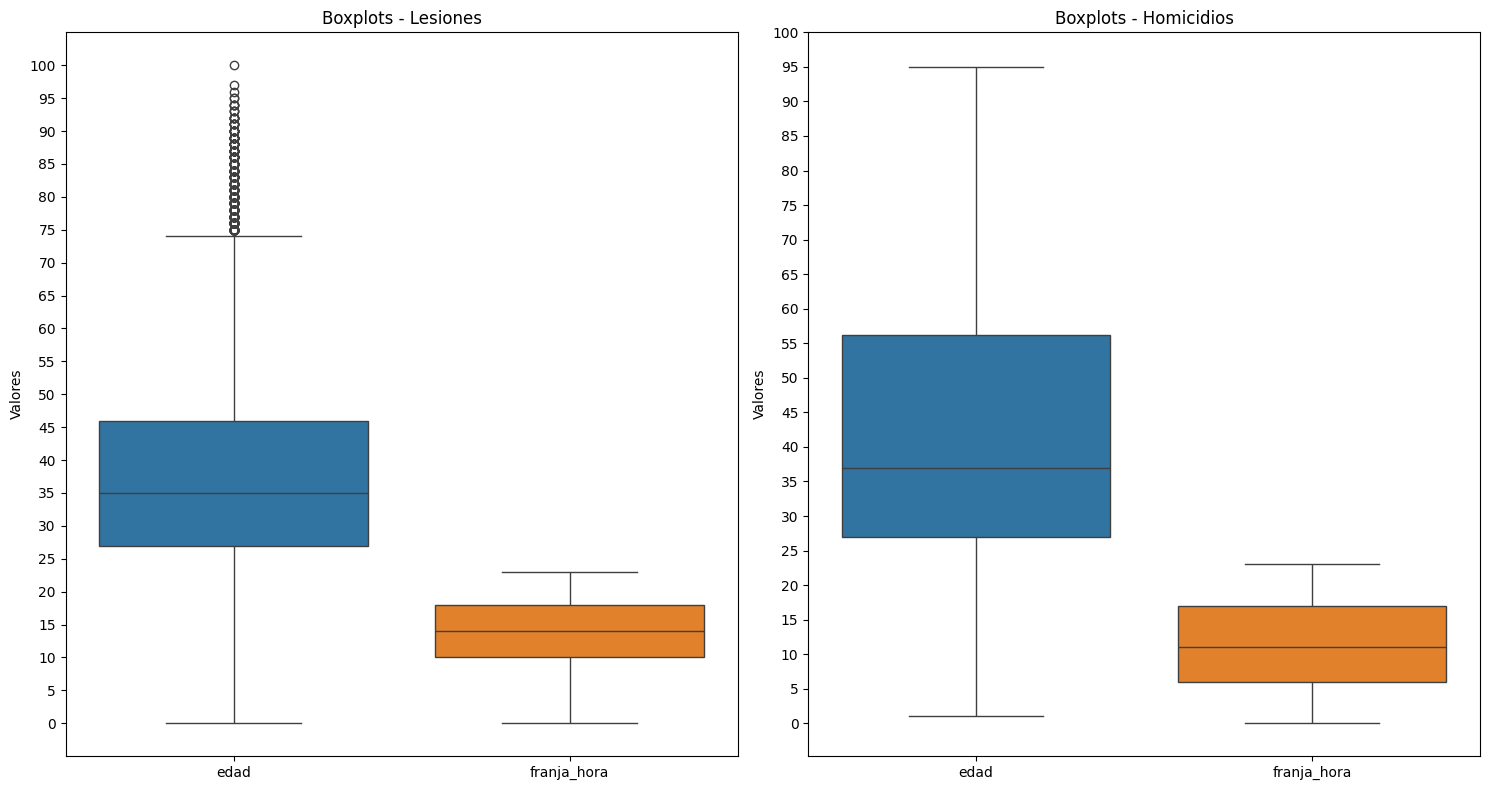

In [38]:
# Se crean subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Boxplot para df_lesiones
sns.boxplot(data=df_lesiones[[ 'edad','franja_hora']], ax=axes[0])
axes[0].set_title('Boxplots - Lesiones')
axes[0].set_ylabel('Valores')

# Se ajustan el número de ticks en el eje y
axes[0].set_yticks(range(0, 101, 5)) 

# Boxplot para df_homicidios
sns.boxplot(data=df_homicidios[[ 'edad','franja_hora' ]], ax=axes[1])
axes[1].set_title('Boxplots - Homicidios')
axes[1].set_ylabel('Valores')

# Se ajustan el número de ticks en el eje y
axes[1].set_yticks(range(0, 101, 5))  

# Ajustar el diseño
plt.tight_layout()
plt.show()

### Análisis Comparativo entre Incidentes de Lesiones y Homicidios

#### Cantidad de Víctimas:
En los incidentes de lesiones, la cantidad promedio de víctimas es mayor (1.42) en comparación con los homicidios (1.06). El incidente con la mayor cantidad de víctimas ocurrió en el contexto de lesiones, donde hubo hasta 16 personas afectadas, mientras que en homicidios, la cifra máxima fue de 3 víctimas.

#### Franja Horaria:
La franja horaria promedio en la que ocurren incidentes de lesiones es alrededor de las 11:33 a.m, mientras que para homicidios es a las 13:33 hs.

#### Edad de las Víctimas:
La edad promedio de las víctimas en incidentes de lesiones es de 37.73 años, mientras que en homicidios es de 42.17 años. Ambos tipos de incidentes muestran una variabilidad considerable en las edades, con un rango desde 1 hasta 100 años.

## ANALISIS DE ACCIDENTES POR COMUNA

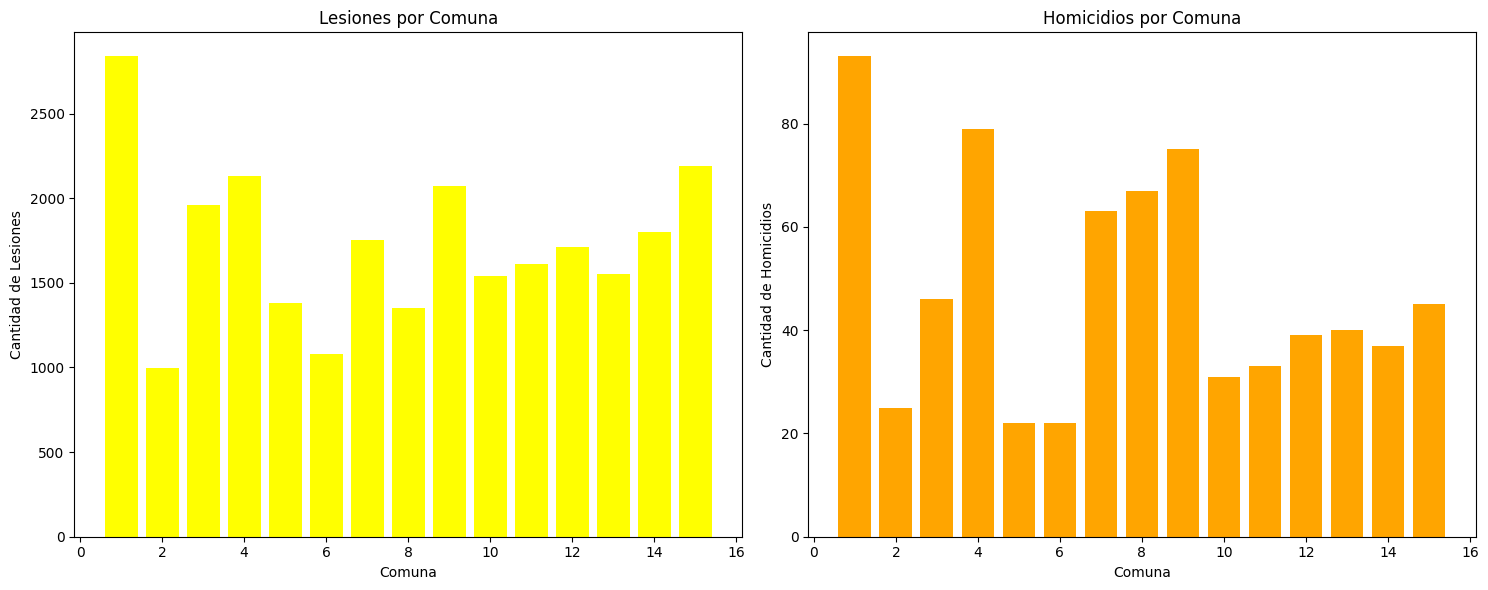

In [40]:
# Se crea un DataFrame que contenga la cantidad de accidentes por comuna en df_lesiones
lesiones_por_comuna = df_lesiones['comuna'].value_counts().reset_index()
lesiones_por_comuna.columns = ['comuna', 'cantidad_lesiones']

# Se crea un DataFrame que contenga la cantidad de accidentes por comuna en df_homicidios
homicidios_por_comuna = df_homicidios['comuna'].value_counts().reset_index()
homicidios_por_comuna.columns = ['comuna', 'cantidad_homicidios']

# Se unen ambos DataFrames en base a la comuna
df_comparacion_comunas = lesiones_por_comuna.merge(homicidios_por_comuna, on='comuna', how='outer')

# Se ordenan el DataFrame por comuna
df_comparacion_comunas = df_comparacion_comunas.sort_values(by='comuna')

# Se crean los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Barra para lesiones
axs[0].bar(df_comparacion_comunas['comuna'], df_comparacion_comunas['cantidad_lesiones'], color='yellow')
axs[0].set_title('Lesiones por Comuna')
axs[0].set_xlabel('Comuna')
axs[0].set_ylabel('Cantidad de Lesiones')

# Barra para homicidios
axs[1].bar(df_comparacion_comunas['comuna'], df_comparacion_comunas['cantidad_homicidios'], color='orange')
axs[1].set_title('Homicidios por Comuna')
axs[1].set_xlabel('Comuna')
axs[1].set_ylabel('Cantidad de Homicidios')


plt.tight_layout()


plt.show()

### Destacando la Incidencia de Accidentes en la Comuna 1

Al examinar la información recopilada de accidentes de tráfico en la ciudad, se observa que la Comuna 1 sobresale por presentar la mayor incidencia de incidentes, tanto en términos de lesionados como de víctimas fatales.

Este hallazgo es relevante ya que indica que la Comuna 1 puede ser un área de mayor riesgo en términos de seguridad vial. Esto sugiere la necesidad de implementar medidas específicas de prevención y control de accidentes en esta zona para reducir la frecuencia y gravedad de los siniestros viales.


## ANALISIS DE DISTRIBUCION DE LESIONES POR AÑO

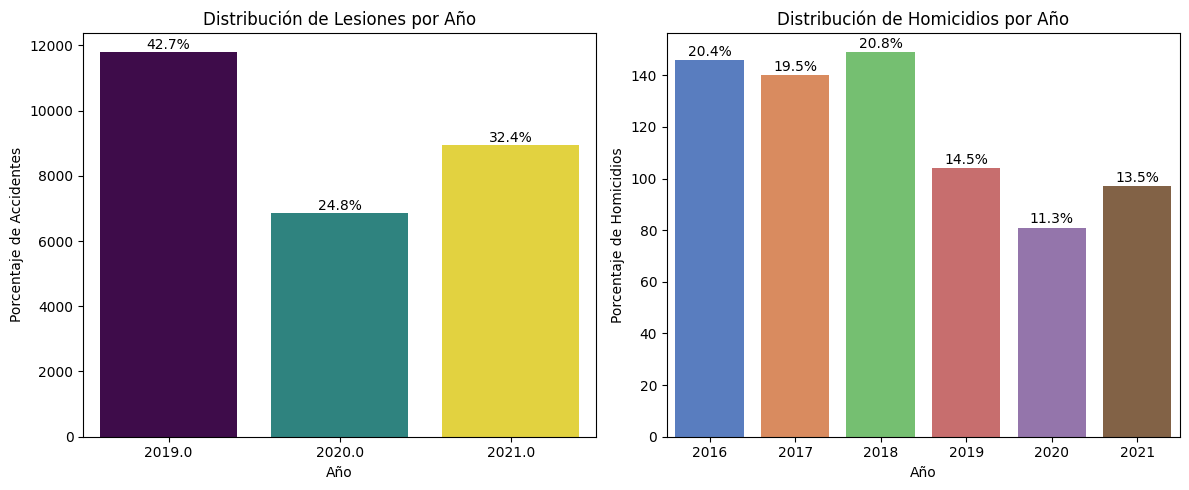

In [41]:
plt.figure(figsize=(12, 5))

# Gráfico de barras para df_lesiones con porcentajes
plt.subplot(1, 2, 1)
total_lesiones = len(df_lesiones)
sns.countplot(x=df_lesiones['fecha'].dt.year, hue=df_lesiones['fecha'].dt.year, palette='viridis', legend=False)
plt.title('Distribución de Lesiones por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Accidentes')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5,
                   f'{height/total_lesiones:.1%}', ha='center', va='bottom')

# Gráfico de barras para df_homicidios con porcentajes
plt.subplot(1, 2, 2)
total_homicidios = len(df_homicidios)
sns.countplot(x=df_homicidios['fecha'].dt.year, hue=df_homicidios['fecha'].dt.year, palette='muted', legend=False)
plt.title('Distribución de Homicidios por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Homicidios')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5,
                   f'{height/total_homicidios:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Distribución de Lesiones y Homicidios por Año

En el análisis de la distribución de lesiones por año, se observa que solo se disponen de datos para los años 2019, 2020 y 2021. Entre estos años, el 2019 destaca como el año con mayor número de víctimas de lesiones por accidentes, representando el 42.7% del total. Este hallazgo sugiere una tendencia preocupante en términos de seguridad vial para ese año.

Por otro lado, en el análisis de la distribución de homicidios por año, se dispone de datos desde el año 2016 hasta el 2021. El año 2018 se destaca como el año con el mayor número de muertes por accidentes, representando el 20.8% del total. Le siguen los años 2016 y 2017, con un 20.4% y 19.5% respectivamente. Este patrón indica una tendencia preocupante en términos de seguridad vial durante esos años.

Es importante destacar que en ambos análisis, se observa que el año con menos víctimas es el 2020. Esta disminución probablemente se deba a las restricciones y confinamientos impuestos durante la pandemia de COVID-19, lo cual redujo significativamente la movilidad y, por ende, la incidencia de accidentes de tráfico.

Estos hallazgos resaltan la importancia de implementar medidas efectivas de prevención y control de accidentes para reducir el número de víctimas y garantizar la seguridad vial en la ciudad.


## ANALISIS ACCIDENTES POR TIPO  DE CALLE

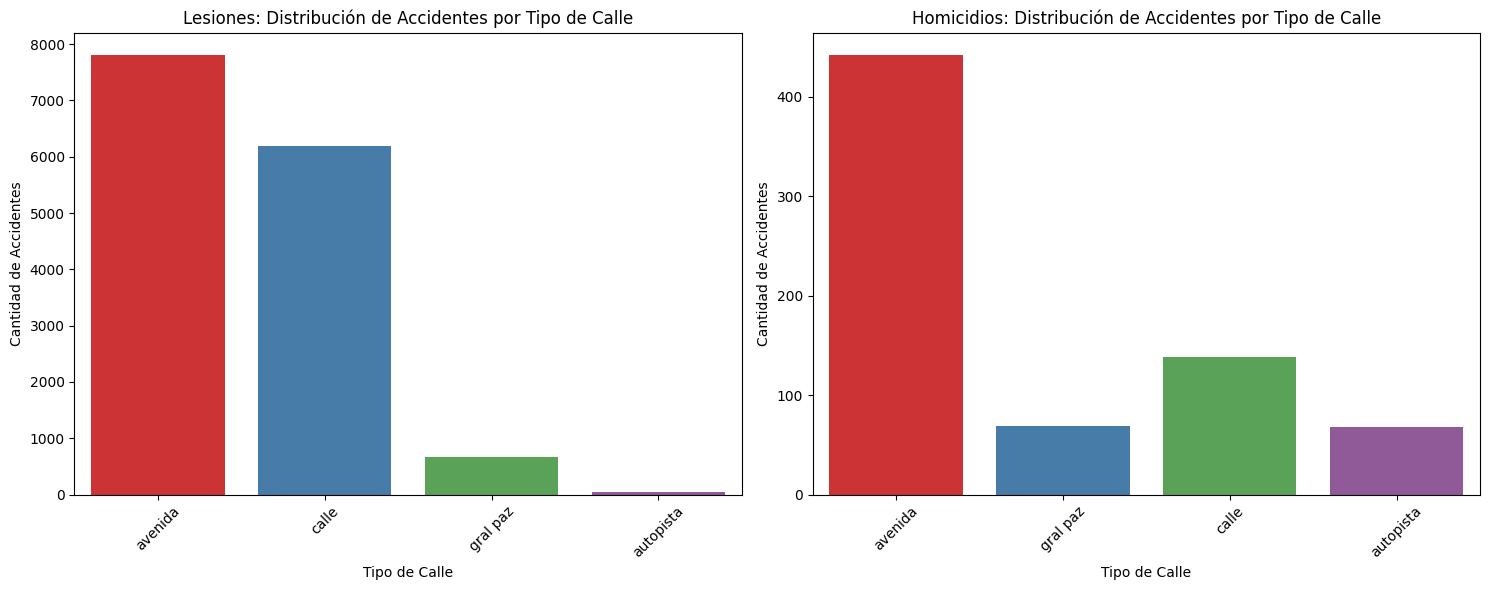

In [43]:
# Se crean subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico para Lesiones
sns.countplot(x='tipo_calle', data=df_lesiones, ax=axes[0], palette='Set1', hue=df_lesiones['tipo_calle'], legend=False)
axes[0].set_title('Lesiones: Distribución de Accidentes por Tipo de Calle')
axes[0].set_xlabel('Tipo de Calle')
axes[0].set_ylabel('Cantidad de Accidentes')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico para Homicidios
sns.countplot(x='tipo_calle', data=df_homicidios, ax=axes[1], palette='Set1', hue=df_homicidios['tipo_calle'], legend=False)
axes[1].set_title('Homicidios: Distribución de Accidentes por Tipo de Calle')
axes[1].set_xlabel('Tipo de Calle')
axes[1].set_ylabel('Cantidad de Accidentes')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Ubicación de los Siniestros Viales

Los siniestros viales, tanto fatales como no fatales, tienen lugar predominantemente en avenidas, seguidas por calles. Esto sugiere que las vías principales de la ciudad son escenarios comunes para la ocurrencia de accidentes de tráfico.

Sin embargo, al analizar específicamente los accidentes fatales, se observa que las avenidas destacan de manera significativa. Esto indica que las avenidas son lugares de mayor riesgo para la ocurrencia de accidentes mortales, lo cual puede estar relacionado con la velocidad y el flujo de tráfico en estas vías.

Estos hallazgos subrayan la importancia de implementar medidas de seguridad vial específicas en las avenidas para reducir la incidencia de accidentes mortales y garantizar la seguridad de los usuarios de la vía.

## ANALISIS SINIESTROS POR FRANJA HORARIA

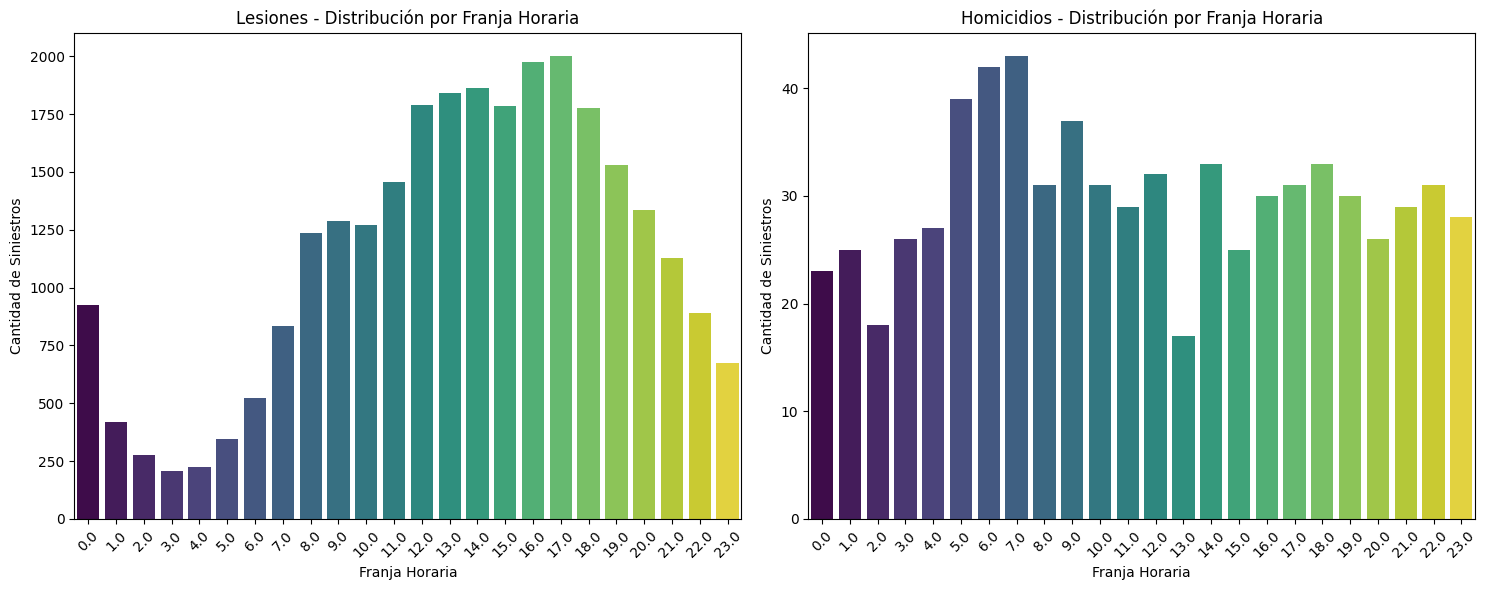

In [44]:
# Se crea los gráficos de barras uno al lado del otro
plt.figure(figsize=(15, 6))

# Gráfico de lesiones por franja horaria
plt.subplot(1, 2, 1)
sns.countplot(x='franja_hora', data=df_lesiones, palette='viridis', hue=df_lesiones['franja_hora'], legend=False)
plt.title('Lesiones - Distribución por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)

# Gráfico de homicidios por franja horaria
plt.subplot(1, 2, 2)
sns.countplot(x='franja_hora', data=df_homicidios, palette='viridis', hue=df_homicidios['franja_hora'], legend=False)
plt.title('Homicidios - Distribución por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Análisis de la Distribución Horaria de Lesiones y Accidentes Fatales

En los dos gráficos presentados, se observa una diferencia significativa en la distribución horaria de lesiones y accidentes fatales:

#### Lesiones por Siniestros Viales:
- La hora con menos lesiones por siniestros viales es entre la 01:00 y las 06:00 de la mañana, indicando un período de menor actividad vial y posiblemente menos tráfico en las calles durante esas horas.

#### Accidentes Fatales:
- Las horas más propensas para los accidentes fatales son entre las 05:00 y las 07:00 de la mañana, lo que sugiere un mayor riesgo en el tráfico durante las primeras horas del día.
- Desde las 12:00 del mediodía hasta las 18:00 horas es la franja horaria donde se registra la mayor cantidad de lesionados por accidentes, probablemente debido al aumento del tráfico durante las horas pico.
- A las 02:00 de la mañana y a las 13:00 se observa que son las horas con menos fallecidos en accidentes, lo cual puede estar relacionado con una menor actividad vial y menos tráfico en esas horas específicas.

Estos hallazgos proporcionan información valiosa para la planificación de medidas de seguridad vial y la implementación de estrategias para reducir la incidencia de lesiones y accidentes fatales en diferentes momentos del día.

## ANALISIS LESIONES POR GENERO

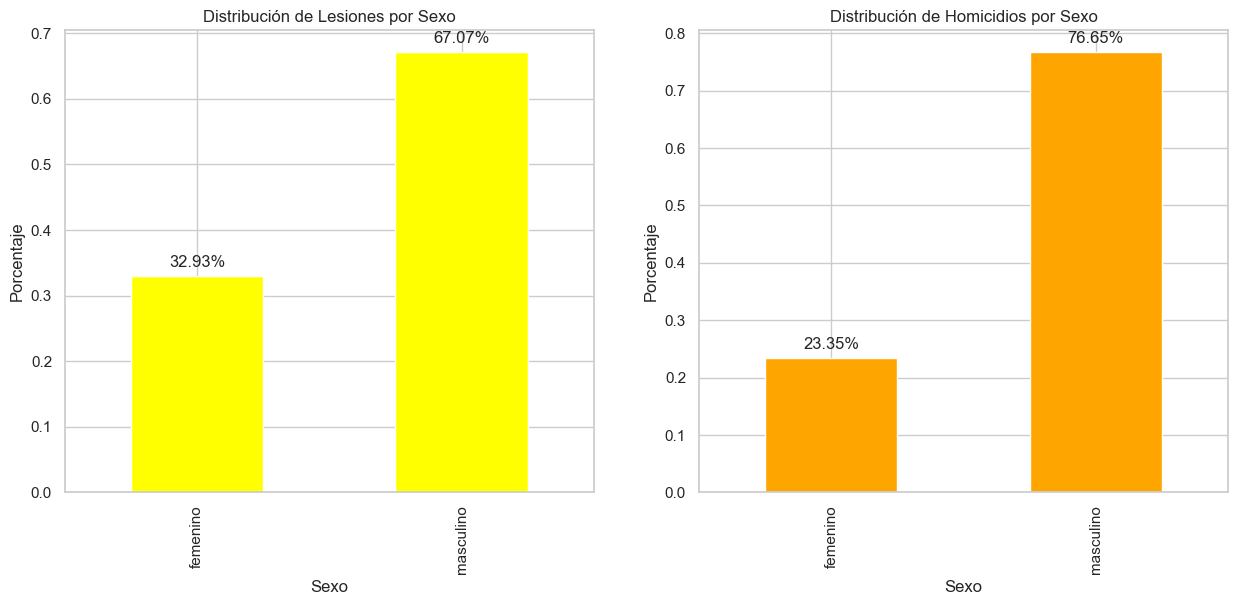

In [46]:
sns.set(style="whitegrid")

# Se crean subgráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para Lesiones por Sexo
lesiones_sex_plot = df_lesiones['sexo'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[0], color='yellow')
axes[0].set_title('Distribución de Lesiones por Sexo')
axes[0].set_ylabel('Porcentaje')
axes[0].set_xlabel('Sexo')

# Se muestran los porcentajes en las barras
for p in lesiones_sex_plot.patches:
    lesiones_sex_plot.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Gráfico para Homicidios por Sexo
homicidios_sex_plot = df_homicidios['sexo'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Distribución de Homicidios por Sexo')
axes[1].set_ylabel('Porcentaje')
axes[1].set_xlabel('Sexo')

# Se muestran los porcentajes en las barras
for p in homicidios_sex_plot.patches:
    homicidios_sex_plot.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Proporción de Género en Lesionados y Víctimas Fatales

Tanto para los lesionados como para las víctimas fatales, el porcentaje de hombres (masculino) afectados es del 67% y 76.6% respectivamente. Esto sugiere una mayor prevalencia de hombres como víctimas de accidentes de tráfico.

Sin embargo, es importante considerar que en Argentina, el porcentaje de mujeres (femenino) con licencia de conducir es del 35%, según un informe emitido por seguridad vial. Esta información arroja luz sobre el hecho de que, aunque el porcentaje de mujeres involucradas en accidentes parezca menor, podría estar relacionado con una menor representación de mujeres en el total de conductores.

Esto destaca la importancia de abordar la seguridad vial desde una perspectiva de género y diseñar estrategias específicas para promover la seguridad de todos los usuarios de la vía, independientemente de su género.

In [47]:
df_homicidios['gravedad'] = 'fatal'
# Se agrega una nueva columna para el identificador único de la víctima
df_homicidios['id_victima'] = df_homicidios.groupby('id_siniestro').cumcount() + 1

# Se muestra el DataFrame resultante
df_homicidios.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,id_victima
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal,1
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal,1
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal,1
3,2016-0004,1,2016-01-10,0.0,avenida,8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18.0,fatal,1
4,2016-0005,1,2016-01-21,5.0,avenida,1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29.0,fatal,1


In [48]:
# Se concatenan los dos DataFrames verticalmente 
siniestros = pd.concat([df_homicidios, df_lesiones], ignore_index=True)

print(siniestros.shape) 
siniestros

C:\Users\Gary Alexander Bean\AppData\Local\Temp\ipykernel_3104\273572139.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  siniestros = pd.concat([df_homicidios, df_lesiones], ignore_index=True)


(28316, 15)


,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,id_victima
0,2016-0001,1,2016-01-01,4.0,avenida,8.0,-5.847534e+01,-3.468757e+01,moto,auto,conductor,masculino,19.0,fatal,1
1,2016-0002,1,2016-01-02,1.0,gral paz,9.0,-5.850878e+01,-3.466978e+01,auto,pasajeros,conductor,masculino,70.0,fatal,1
2,2016-0003,1,2016-01-03,7.0,avenida,1.0,-5.839040e+01,-3.463189e+01,moto,auto,conductor,masculino,30.0,fatal,1
3,2016-0004,1,2016-01-10,0.0,avenida,8.0,-5.846504e+01,-3.468093e+01,moto,NaN,conductor,masculino,18.0,fatal,1
4,2016-0005,1,2016-01-21,5.0,avenida,1.0,-5.838718e+01,-3.462247e+01,moto,pasajeros,conductor,masculino,29.0,fatal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28311,LC-2021-0652865,2,2021-12-31,19.0,avenida,9.0,-5.848833e+01,-3.464175e+01,NaN,NaN,NaN,masculino,28.0,leve,1
28312,LC-2021-0652865,2,2021-12-31,19.0,avenida,9.0,-5.848833e+01,-3.464175e+01,NaN,NaN,NaN,masculino,52.0,leve,2
28313,LC-2021-0652907,1,2021-12-31,20.0,NaN,1.0,-5.838289e+01,-3.458308e+01,NaN,NaN,NaN,masculino,23.0,leve,1
28314,LC-2021-0652921,1,2021-12-31,22.0,calle,5.0,-5.841453e+01,-3.461429e+01,moto,transporte publico,NaN,masculino,31.0,grave,1


In [49]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      28316 non-null  object        
 1   nro_victimas      28316 non-null  int64         
 2   fecha             28315 non-null  datetime64[ns]
 3   franja_hora       28306 non-null  float64       
 4   tipo_calle        15436 non-null  object        
 5   comuna            26691 non-null  float64       
 6   longitud          26659 non-null  float64       
 7   latitud           26659 non-null  float64       
 8   vehiculo_victima  15484 non-null  object        
 9   vehiculo_acusado  10374 non-null  object        
 10  rol               706 non-null    category      
 11  sexo              26082 non-null  category      
 12  edad              23792 non-null  float64       
 13  gravedad          28316 non-null  object        
 14  id_victima        2831

In [50]:
# Se agrega una nueva columna para el identificador único de la víctima
siniestros['id_victima'] = siniestros.groupby('id_siniestro').cumcount() + 1

# Se muestra el DataFrame resultante
siniestros.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,id_victima
0,2016-0001,1,2016-01-01,4.0,avenida,8.0,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal,1
1,2016-0002,1,2016-01-02,1.0,gral paz,9.0,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal,1
2,2016-0003,1,2016-01-03,7.0,avenida,1.0,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal,1
3,2016-0004,1,2016-01-10,0.0,avenida,8.0,-58.465039,-34.680930,moto,NaN,conductor,masculino,18.0,fatal,1
4,2016-0005,1,2016-01-21,5.0,avenida,1.0,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29.0,fatal,1


In [51]:
siniestros.to_csv('siniestros.csv',index = False)